# Business Case 2: Modeling

# Contents:
 * [Modeling](#modeling)
      * [DecisionTreeClassifier](#dtdatamm)
      * [RandomForestClassifier](#rftrainmm)
      * [CatBoostClassifier](#cbtrainmm)
   

# Imports and Installs

In [1]:
#! pip install shap
#!pip install catboost

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict
import os
from os.path import abspath, join, pardir
import numpy as np
from joblib import dump
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
import graphviz
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import pydotplus
import shap
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix

# Modeling  <a name="modeling"></a>
>In this step, we applied two algorithms - DecisionTreeClassifier and RandomForestClassifier - to our final dataset. We split the data into 2 subgroups: train (80%) and test (20%). To evaluate and compare the models, we used confusion matrix, performance metrics and AUC. 

In [2]:
finaldata = pd.read_csv('finaldataset.csv')  
finaldata.drop('Unnamed: 0', axis =1, inplace = True)

In [3]:
finaldata

,LeadTime,Adults,StaysInWeekendNights,PreviousCancellations,PreviousBookingsNotCanceled,StaysInWeekNights,BookingChanges,DaysInWaitingList,TotalOfSpecialRequests,RequiredCarParkingSpaces,...,Agent_Other,Company_ NULL,Company_Company,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party,RoomChange_No,RoomChange_Yes,IsCanceled
0,0.009539,0.25,0.000000,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,0.139905,0.50,0.000000,0.0,0.0,0.117647,0.0,0.0,0.2,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,0.103339,0.25,0.000000,0.0,0.0,0.117647,0.0,0.0,0.2,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,0.146264,0.50,0.142857,0.0,0.0,0.117647,0.0,0.0,0.4,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4,0.158983,0.50,0.000000,0.0,0.0,0.058824,0.0,0.0,0.2,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53266,0.036566,0.50,0.142857,0.0,0.0,0.147059,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
53267,0.162162,0.75,0.142857,0.0,0.0,0.147059,0.0,0.0,0.4,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
53268,0.054054,0.50,0.142857,0.0,0.0,0.147059,0.0,0.0,0.8,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
53269,0.173291,0.50,0.142857,0.0,0.0,0.147059,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [4]:
cat = finaldata.columns[12:].to_list()
num = finaldata.columns.drop(cat).to_list()  
cat.remove('IsCanceled') 
target = "IsCanceled"

## DecisionTree Classifier <a name="dtdatamm"></a>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    finaldata.drop('IsCanceled', axis=1),
    finaldata['IsCanceled'],
    stratify=finaldata['IsCanceled'],
    test_size=0.2,
    random_state=1)

In [6]:
# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=1)

# Define the grid to explore
grid = {
    "criterion": ["entropy", "gini"],
    "splitter": ["random", "best"],
    "max_depth": [22, 25, 28],
    "min_samples_leaf" : [0.5,1, 2], 
    "min_samples_split": [0.001, 0.002, 0.003],
    "max_features": [27, 28, 30],
    "min_impurity_decrease" : [0.0001, 0.0002],
    "class_weight": [{0: 1, 1: 2}, {0: 0.35, 1: 0.65}]
    }

In [7]:
# Instatiating GridSearch
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
gscv = GridSearchCV(dt, grid, cv=splitter, scoring='f1', refit=True, verbose=-1, n_jobs=4)

# Get ID of grid search
# id_num = input("Insert GridSearch ID number: ")
id_num = 1

In [8]:
PROJECT_ROOT = abspath(pardir) # NOTE: pardir stands for "parent directory"
PROJECT_ROOT

'C:\\Users\\andre\\OneDrive\\Ambiente de Trabalho'

In [9]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=4,
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 0.35, 1: 0.65}],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [22, 25, 28],
                         'max_features': [27, 28, 30],
                         'min_impurity_decrease': [0.0001, 0.0002],
                         'min_samples_leaf': [0.5, 1, 2],
                         'min_samples_split': [0.001, 0.002, 0.003],
                         'splitter': ['random', 'best']},
             scoring='f1', verbose=-1)

In [71]:
# Saving cv_results for specific Grid Search run
out_path = join(PROJECT_ROOT, 'analysis')
score_summary = pd.DataFrame(gscv.cv_results_).sort_values(by="mean_test_score", ascending=False)
score_summary.to_csv(os.path.join(out_path, 'grid_search_results{}.csv'.format(id_num)))

# Saving best model
best_dt = gscv.best_estimator_
dump(best_dt, os.path.join(out_path, 'best_decision_tree{}.joblib'.format(id_num)))

# Get test set y_pred and evaluate on precision
y_test_pred_dt = best_dt.predict(X_test)
    
print("The hyper-parameters selected are:\n", gscv.best_params_)

The hyper-parameters selected are:
 {'class_weights': {0: 1, 1: 2}, 'depth': 10, 'iterations': 50, 'learning_rate': 0.2}


In [11]:
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7448
           1       0.65      0.73      0.69      3207

    accuracy                           0.80     10655
   macro avg       0.76      0.78      0.77     10655
weighted avg       0.81      0.80      0.80     10655



In [12]:
# Test set confusion matrix
pd.DataFrame(data=confusion_matrix(y_test, y_test_pred_dt), 
             index=pd.Index(np.array([0,1]), name="True"), 
             columns=pd.Index(np.array([0,1]), name="Pred"))

Pred,0,1
True,,
0,6159,1289
1,853,2354


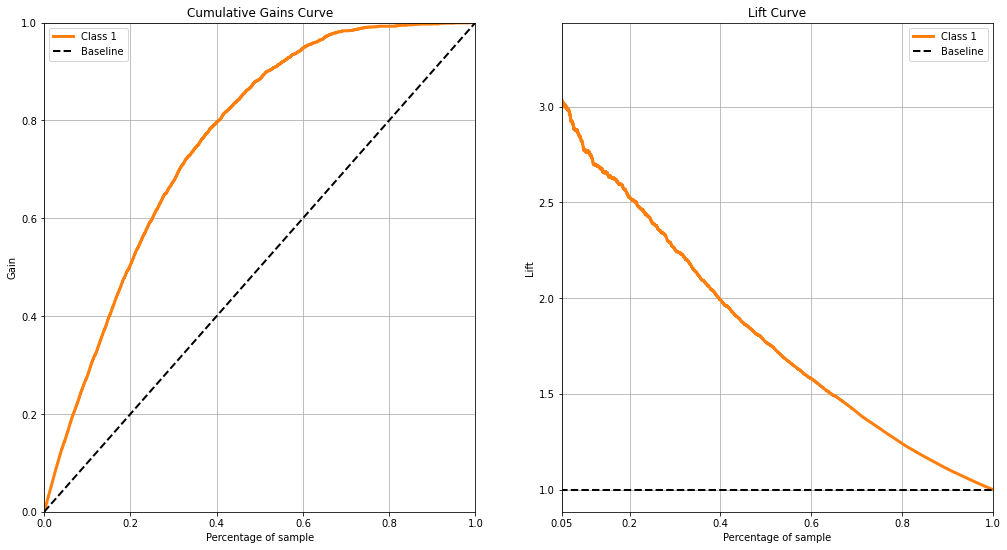

In [23]:
# Plot lift curves
predicted_probas = best_dt.predict_proba(X_test)

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 9))
plot_cumulative_gain(y_test, predicted_probas, ax=ax1)
plot_lift_curve(y_test, predicted_probas, ax=ax2)  # Lift is a measure of the effectiveness of a predictive model
                                                   # calculated as the ratio between the results obtained with and 
                                                   # without the predictive model.
# properties
ax2.set_xlim(0.05, 1)
ax2.set_xticks([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_xticklabels([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
for ax in (ax1, ax2):
    ax.axes.lines[0].remove()
    ax.get_legend().remove()
    ax.legend()

plt.show()

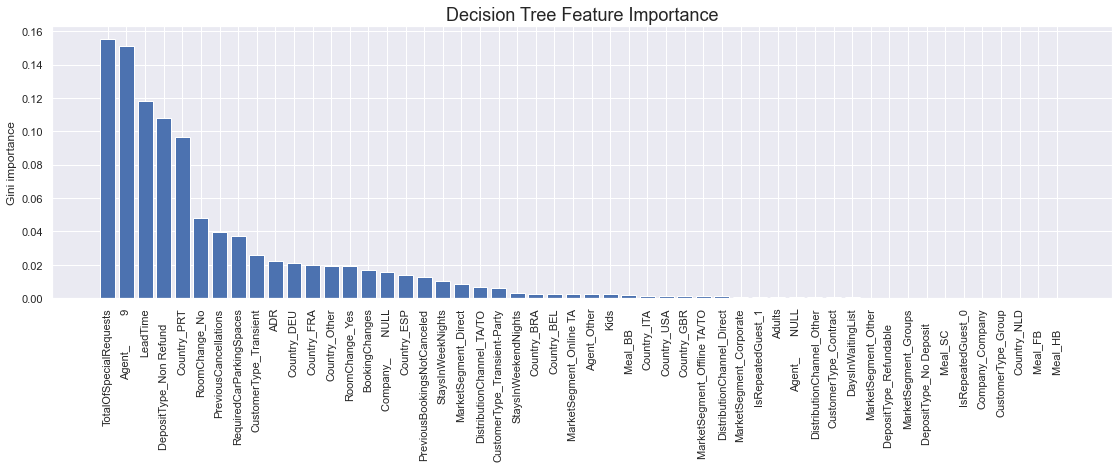

In [26]:
# Decision Tree Feature Importance plot
sns.set()

# data
feature_names = finaldata[num+cat].columns
feature_importances = pd.Series(best_dt.feature_importances_, index=feature_names).\
    sort_values(ascending=False)

# figure
fig = plt.figure(figsize=(19,5))

# axis
plt.bar(x=feature_importances.index, height=feature_importances.values)

# properties
plt.ylabel("Gini importance")  # The importance of a feature is computed as the (normalized) total reduction of the 
                               # criterion brought by that feature. It is also known as the Gini importance.
plt.xticks(rotation=90)
plt.title("Decision Tree Feature Importance", fontsize=18)

plt.show()

In [29]:
def plot_tree(model):
    dot_data = export_graphviz(model,
                               max_depth= 5,
                               feature_names=X_train.columns,  
                               class_names=["not_cancelled", "cancelled"],
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"30,30"')
    return graphviz.Source(pydot_graph.to_string())

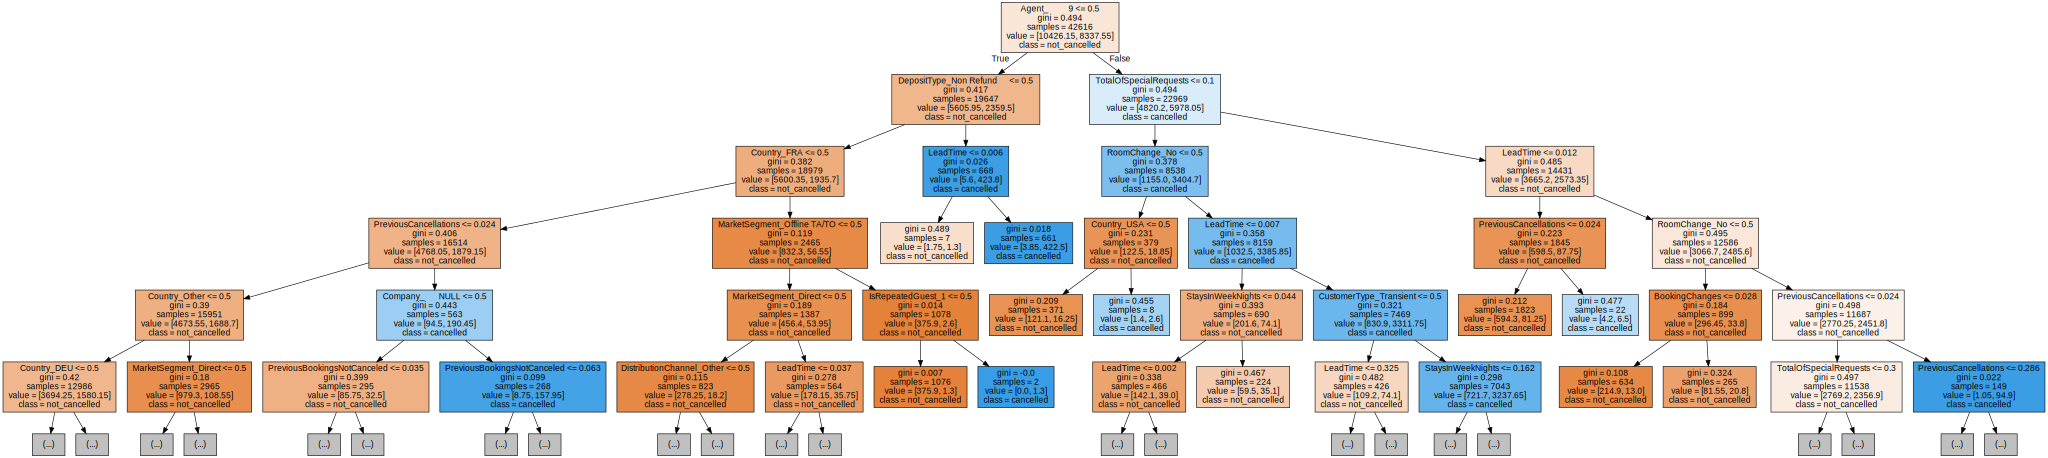

In [30]:
plot_tree(best_dt)

In [31]:
# Fits the explainer
explainer = shap.Explainer(best_dt.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 10656it [05:10, 33.53it/s]                                                                      


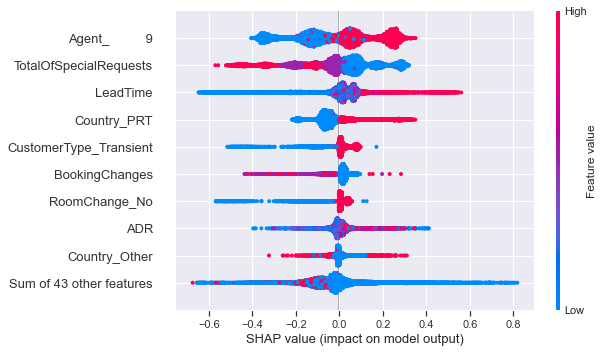

<Figure size 432x288 with 0 Axes>

In [32]:
shap.plots.beeswarm(shap_values)

## Random Forest Classifier <a name="rftrainmm"></a>

In [34]:
# Define the Decision Tree model
rf = RandomForestClassifier(random_state=1)

# Define the grid to explore
grid = {
    "max_depth":[10, 12, 15],
    "n_estimators" : [25,30,35],
    "class_weight" : [{0:1, 1:2}, {0:0.32, 1:0.68}],
    "criterion" : ['gini', 'entropy'],
    "min_samples_leaf": [50, 100, 200],
    "min_impurity_decrease": [0.001, 0.01]
    
}

In [35]:
# Instatiating GridSearch
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
gscv = GridSearchCV(rf, grid, cv=splitter, scoring='f1', refit=True, verbose=-1, n_jobs=4)

# Get ID of grid search
# id_num = input("Insert GridSearch ID number: ")
id_num = 1

In [36]:
PROJECT_ROOT = abspath(pardir) # NOTE: pardir stands for "parent directory"
PROJECT_ROOT

'C:\\Users\\andre\\OneDrive\\Ambiente de Trabalho'

In [37]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(random_state=1), n_jobs=4,
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 0.32, 1: 0.68}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15],
                         'min_impurity_decrease': [0.001, 0.01],
                         'min_samples_leaf': [50, 100, 200],
                         'n_estimators': [25, 30, 35]},
             scoring='f1', verbose=-1)

In [40]:
# Saving cv_results for specific Grid Search run
out_path = join(PROJECT_ROOT, 'analysis')
score_summary = pd.DataFrame(gscv.cv_results_).sort_values(by="mean_test_score", ascending=False)
score_summary.to_csv(os.path.join(out_path, 'grid_search_results{}.csv'.format(id_num)))

# Saving best model
best_rf = gscv.best_estimator_
dump(best_rf, os.path.join(out_path, 'best_decision_tree{}.joblib'.format(id_num)))

# Get test set y_pred and evaluate on precision
y_test_pred_rf = best_rf.predict(X_test)
    
print("The hyper-parameters selected are:\n", gscv.best_params_)

The hyper-parameters selected are:
 {'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy', 'max_depth': 15, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 50, 'n_estimators': 35}


In [41]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      7448
           1       0.56      0.82      0.67      3207

    accuracy                           0.75     10655
   macro avg       0.73      0.77      0.74     10655
weighted avg       0.80      0.75      0.76     10655



In [42]:
# Test set confusion matrix
pd.DataFrame(data=confusion_matrix(y_test, y_test_pred_rf), 
             index=pd.Index(np.array([0,1]), name="True"), 
             columns=pd.Index(np.array([0,1]), name="Pred"))

Pred,0,1
True,,
0,5415,2033
1,580,2627


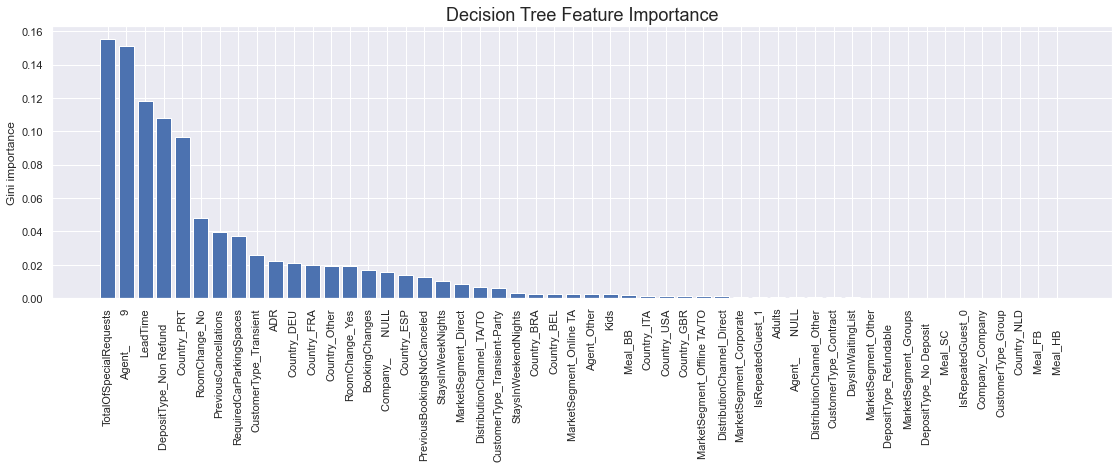

In [43]:
# Random Forest Feature Importance plot
sns.set()

# data
feature_names = finaldata[num+cat].columns
feature_importances = pd.Series(best_dt.feature_importances_, index=feature_names).\
    sort_values(ascending=False)

# figure
fig = plt.figure(figsize=(19,5))

# axis
plt.bar(x=feature_importances.index, height=feature_importances.values)

# properties
plt.ylabel("Gini importance")  # The importance of a feature is computed as the (normalized) total reduction of the 
                               # criterion brought by that feature. It is also known as the Gini importance.
plt.xticks(rotation=90)
plt.title("Decision Tree Feature Importance", fontsize=18)

plt.show()

In [44]:
def plot_tree(model):
    dot_data = export_graphviz(model,
                               max_depth= 2,
                               feature_names=X_train.columns,  
                               class_names=["not_cancelled", "cancelled"],
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"30,30"')
    return graphviz.Source(pydot_graph.to_string())

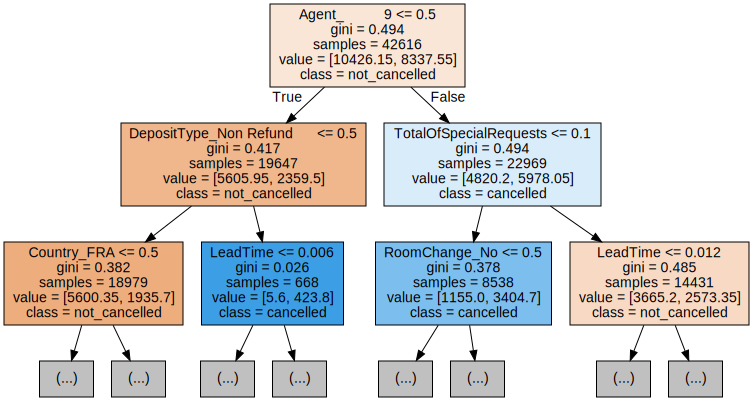

In [45]:
plot_tree(best_dt)

In [46]:
# Fits the explainer
explainer = shap.Explainer(best_dt.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 10656it [05:47, 29.61it/s]                                                                      


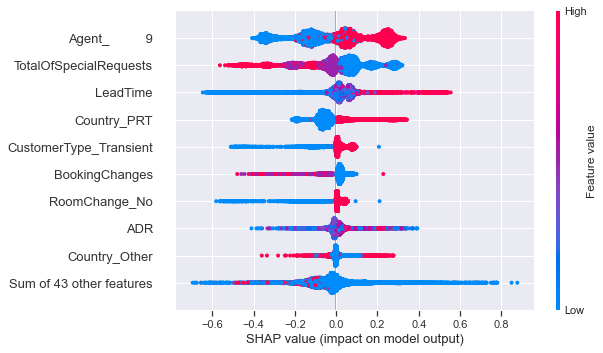

In [47]:
shap.plots.beeswarm(shap_values)

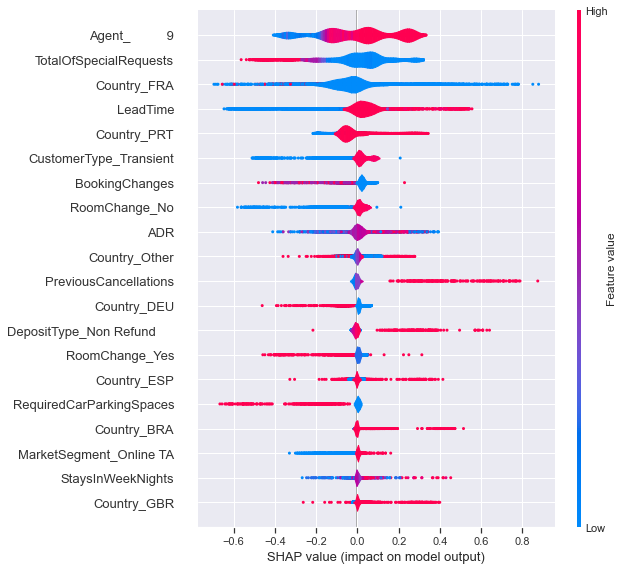

In [48]:
shap.summary_plot(shap_values, plot_type='violin')

## CatBoost <a name="cbtrainmm"></a>

In [49]:
# Define the Decision Tree model
cb = CatBoostClassifier(random_state=1)

# Define the grid to explore
grid = {
    "iterations":[30,35, 40, 50],
    "learning_rate" : [0.2, 0.5, 0.6],
    "class_weights" : [{0:1, 1:2}, {0:0.32, 1:0.68}],
    "depth" : [10, 15, 20],
    
}

In [50]:
# Instatiating GridSearch
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
gscv = GridSearchCV(cb, grid, cv=splitter, scoring='f1', refit=True, verbose=-1, n_jobs=4)

# Get ID of grid search
# id_num = input("Insert GridSearch ID number: ")
id_num = 1

In [51]:
PROJECT_ROOT = abspath(pardir) # NOTE: pardir stands for "parent directory"
PROJECT_ROOT

'C:\\Users\\andre\\OneDrive\\Ambiente de Trabalho'

In [52]:
gscv.fit(X_train, y_train)


240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\andre\anaconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\andre\anaconda3\envs\machinelearning\lib\site-packages\catboost\core.py", line 4768, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\andre\anaconda3\envs\machinelearning\lib\site-packages\catboost\core.py", line 2073, in _fit
    train_params = self._prepare

0:	learn: 0.5885686	total: 182ms	remaining: 8.91s
1:	learn: 0.5270475	total: 218ms	remaining: 5.22s
2:	learn: 0.4939242	total: 255ms	remaining: 3.99s
3:	learn: 0.4738341	total: 291ms	remaining: 3.34s
4:	learn: 0.4590672	total: 334ms	remaining: 3s
5:	learn: 0.4490570	total: 373ms	remaining: 2.74s
6:	learn: 0.4414215	total: 413ms	remaining: 2.54s
7:	learn: 0.4376177	total: 451ms	remaining: 2.37s
8:	learn: 0.4337795	total: 487ms	remaining: 2.22s
9:	learn: 0.4297568	total: 523ms	remaining: 2.09s
10:	learn: 0.4261646	total: 556ms	remaining: 1.97s
11:	learn: 0.4240039	total: 590ms	remaining: 1.87s
12:	learn: 0.4198437	total: 632ms	remaining: 1.8s
13:	learn: 0.4171967	total: 672ms	remaining: 1.73s
14:	learn: 0.4141793	total: 707ms	remaining: 1.65s
15:	learn: 0.4113974	total: 742ms	remaining: 1.58s
16:	learn: 0.4091641	total: 783ms	remaining: 1.52s
17:	learn: 0.4076701	total: 827ms	remaining: 1.47s
18:	learn: 0.4059011	total: 863ms	remaining: 1.41s
19:	learn: 0.4034399	total: 899ms	remaining: 

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x000002232EB18A00>,
             n_jobs=4,
             param_grid={'class_weights': [{0: 1, 1: 2}, {0: 0.32, 1: 0.68}],
                         'depth': [10, 15, 20], 'iterations': [30, 35, 40, 50],
                         'learning_rate': [0.2, 0.5, 0.6]},
             scoring='f1', verbose=-1)

In [53]:
# Saving cv_results for specific Grid Search run
out_path = join(PROJECT_ROOT, 'analysis')
score_summary = pd.DataFrame(gscv.cv_results_).sort_values(by="mean_test_score", ascending=False)
score_summary.to_csv(os.path.join(out_path, 'grid_search_results{}.csv'.format(id_num)))

# Saving best model
best_cb = gscv.best_estimator_
dump(best_cb, os.path.join(out_path, 'best_decision_tree{}.joblib'.format(id_num)))

# Get test set y_pred and evaluate on precision
y_test_pred_cb = best_cb.predict(X_test)

#print("The best model has a mean cross-validated precision of {0:.3f} and a test set precision of {1:.3f}".\
 #     format(gscv.best_score_, precision_score(y_test, y_test_pred)))
    
print("The hyper-parameters selected are:\n", gscv.best_params_)

The hyper-parameters selected are:
 {'class_weights': {0: 1, 1: 2}, 'depth': 10, 'iterations': 50, 'learning_rate': 0.2}


In [54]:
print(classification_report(y_test, y_test_pred_cb))

              precision    recall  f1-score   support

           0       0.91      0.81      0.85      7448
           1       0.64      0.81      0.71      3207

    accuracy                           0.81     10655
   macro avg       0.77      0.81      0.78     10655
weighted avg       0.83      0.81      0.81     10655



In [55]:
# Test set confusion matrix
pd.DataFrame(data=confusion_matrix(y_test, y_test_pred_cb), 
             index=pd.Index(np.array([0,1]), name="True"), 
             columns=pd.Index(np.array([0,1]), name="Pred"))

Pred,0,1
True,,
0,6012,1436
1,624,2583


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


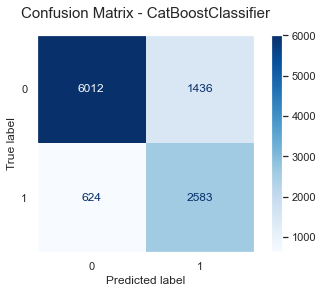

In [56]:
plot_confusion_matrix(best_cb, X_test, y_test, cmap = 'Blues')
plt.grid(False)
plt.title ('Confusion Matrix - CatBoostClassifier', fontsize = 15, y = 1.05)
plt.savefig ('CM_catboost.png', bbox_inches= 'tight')

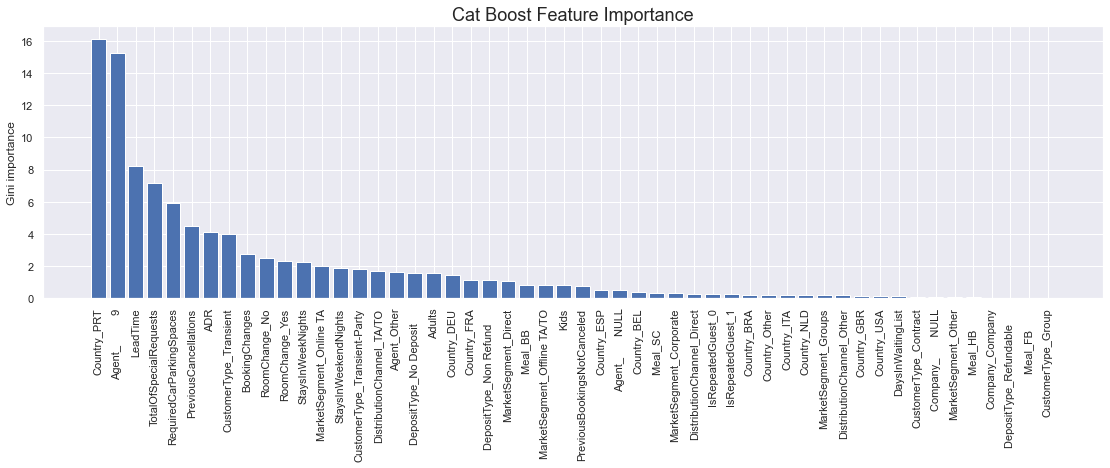

In [77]:
#Cat Boost Feature Importance plot
sns.set()

# data
feature_names = finaldata[num+cat].columns
feature_importances = pd.Series(best_cb.feature_importances_, index=feature_names).\
    sort_values(ascending=False)

# figure
fig = plt.figure(figsize=(19,5))

# axis
plt.bar(x=feature_importances.index, height=feature_importances.values)

# properties
plt.ylabel("Gini importance")  # The importance of a feature is computed as the (normalized) total reduction of the 
                               # criterion brought by that feature. It is also known as the Gini importance.
plt.xticks(rotation=90)
plt.title("Cat Boost Feature Importance", fontsize=18)
plt.savefig ('FeatureImportance.png', bbox_inches= 'tight')

plt.show()

In [58]:
def plot_tree(model):
    dot_data = export_graphviz(model,
                               max_depth= 5,
                               feature_names=X_train.columns,  
                               class_names=["not_cancelled", "cancelled"],
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"30,30"')
    return graphviz.Source(pydot_graph.to_string())

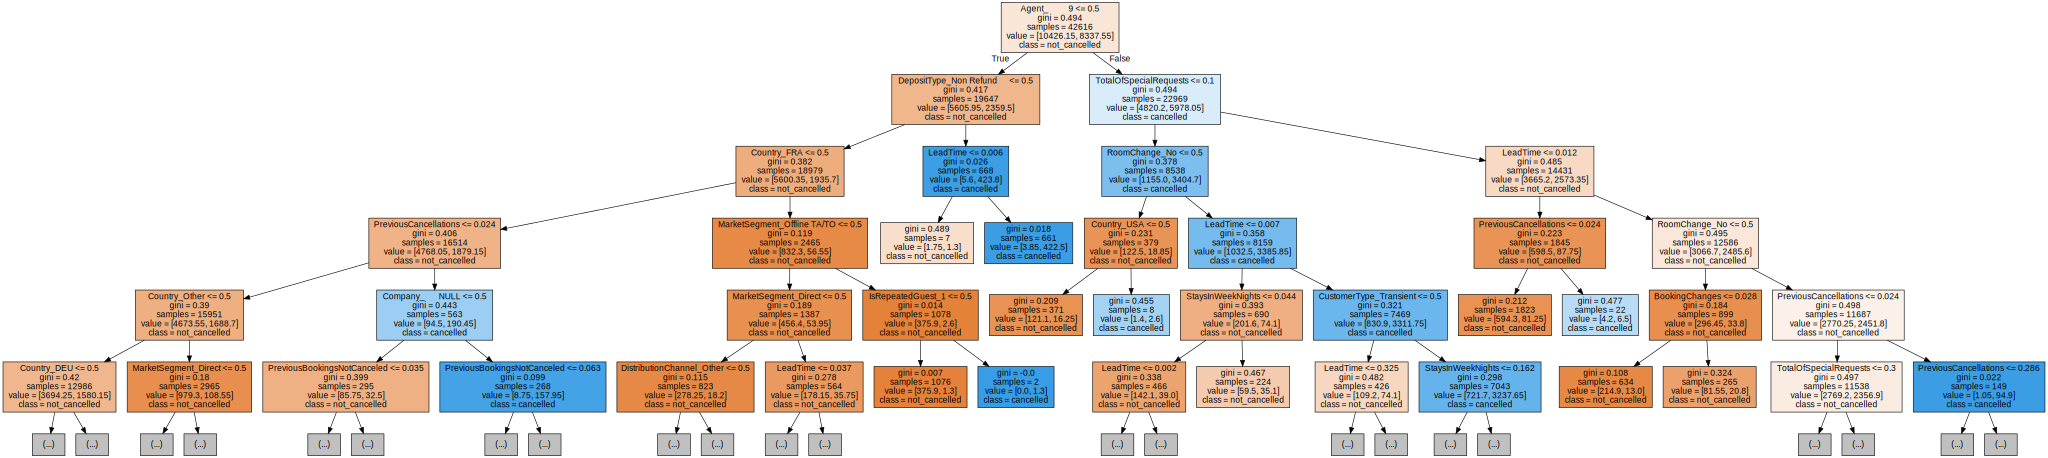

In [59]:
plot_tree(best_dt)

In [60]:
# Fits the explainer
explainer = shap.Explainer(best_cb.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 10656it [10:32, 16.52it/s]                                                                      


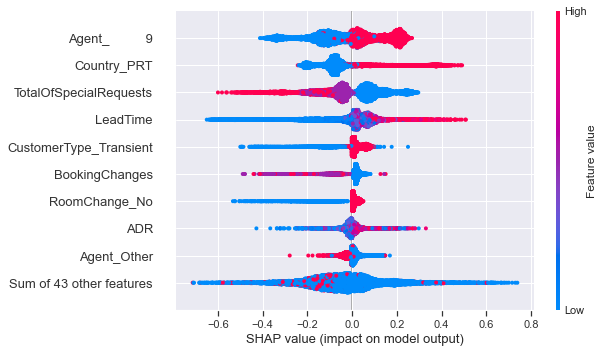

In [61]:
shap.plots.beeswarm(shap_values)

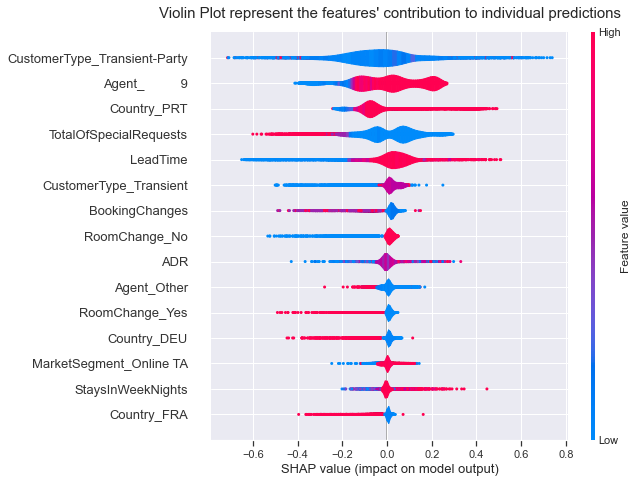

In [62]:
shap.summary_plot(shap_values, plot_type='violin', show=False, max_display = 15)
plt.title ("Violin Plot represent the features' contribution to individual predictions", fontsize = 15, x = 0.5, y = 1.02)
plt.savefig('violinplot_catboost.png',  bbox_inches= 'tight')
